In [11]:
import pandas as pd
import matplotlib 
import matplotlib.pyplot as  plt
import seaborn as sns
import os
import glob

In [2]:
net_list = []
with open("network_filter_fasol09/task.list", 'r') as task_f:
    for line in task_f:
        line = line.strip()
        net_list.append(line)
    

In [3]:
dsc = pd.DataFrame()
for item in net_list:
    description = item
    pdb_file = "network_filter_fasol09/filter_" + item + "_0001.pdb"
    score = {}
    labels = []
    pose = []
    hbnet = []
    hbnet_pdb = "network_filter_fasol09/" + item + "/" + item + "_0001.pdb"
    if os.path.isfile(hbnet_pdb):
        with open(pdb_file, 'r') as score_f:
            for line in score_f:
                if line.startswith("#BEGIN_POSE_ENERGIES_TABLE"):
                    labels = score_f.readline().strip().split(' ')
                    next(score_f)
                    pose = score_f.readline().strip().split(' ')
                    for i in range(1, len(labels)):
                        score[labels[i]] = float(pose[i])
                    for line in score_f:
                        if "pore" in line:
                            score['sasa'] = float(line.split(" ")[1])
                        elif "gly_holes_atm" in line:
                            score['gly_holes_atm'] = float(line.split(" ")[1])
                        elif "gly_holes_res" in line:
                            score['gly_holes_res'] = float(line.split(" ")[1])
                        elif "sc_buns_hbnetA" in line:
                            score['sc_heavy_unsat'] = float(line.split(" ")[1])
                        elif "network_holes_atm" in line:
                            score['network_holes_atm'] = float(line.split(" ")[1])
                        elif "network_holes_res" in line:
                            score['network_holes_res'] = float(line.split(" ")[1])
        score["description"] = description
        with open(hbnet_pdb, 'r') as hbnet_f:
            for line in hbnet_f:
                if "REMARK PDBinfo-LABEL:" in line and " HBNet" in line:
                    hbnet_res = int(line[21:26])
                    hbnet.append(hbnet_res)
        score["hbnet"] = hbnet
        score["n_hbnet"] = len(hbnet)
        if 26 in score["hbnet"]:
            score["hbnet_tyr26"] = True
        else:
            score["hbnet_tyr26"] = False
        if 114 in score["hbnet"]:
            score["hbnet_tyr114"] = True
        else:
            score["hbnet_tyr114"] = False
        dsc = dsc.append(score, ignore_index=True)
    else:
        print(pdb_file)
print(dsc)

network_filter_fasol09/filter_13_input_0076_0004_0006_0002_0006_0007_0001.pdb
network_filter_fasol09/filter_13_input_0076_0004_0006_0002_0006_0010_0001.pdb
network_filter_fasol09/filter_14_input_0012_0004_00014_0005_0010_0001_0001.pdb
network_filter_fasol09/filter_14_input_0012_0004_00019_0005_0005_0003_0001.pdb
network_filter_fasol09/filter_14_input_0012_0004_0009_0003_0003_0002_0001.pdb
network_filter_fasol09/filter_14_input_0012_0005_00014_0005_0001_0007_0001.pdb
network_filter_fasol09/filter_15_input_0197_0001_0003_0001_0002_0003_0001.pdb
network_filter_fasol09/filter_15_input_0197_0001_0003_0005_0002_0009_0001.pdb
network_filter_fasol09/filter_15_input_0197_0004_0009_0004_0002_0001_0001.pdb
network_filter_fasol09/filter_16_input_0198_0004_00012_0004_0001_0009_0001.pdb
network_filter_fasol09/filter_19_input_0095_0001_0004_0005_0003_0001.pdb
network_filter_fasol09/filter_1_input_0034_0002_00010_0001_0004_0005_0001.pdb
network_filter_fasol09/filter_1_input_0034_0002_00010_0001_0004_0

In [5]:
dsc = pd.DataFrame()
for item in net_list:
    description = item
    pdb_file = "network_filter_fasol09/filter_" + item + "_0001.pdb"
    score = {}
    labels = []
    pose = []
    hbnet = []
    hbnet_pdb = "network_filter_fasol09/" + item + "/" + item + "_0001.pdb"
    if os.path.isfile(hbnet_pdb):
        with open(pdb_file, 'r') as score_f:
            for line in score_f:
                if line.startswith("#BEGIN_POSE_ENERGIES_TABLE"):
                    labels = score_f.readline().strip().split(' ')
                    next(score_f)
                    pose = score_f.readline().strip().split(' ')
                    for i in range(1, len(labels)):
                        score[labels[i]] = float(pose[i])
                    for line in score_f:
                        if "pore" in line:
                            score['sasa'] = float(line.split(" ")[1])
                        elif "gly_holes_atm" in line:
                            score['gly_holes_atm'] = float(line.split(" ")[1])
                        elif "gly_holes_res" in line:
                            score['gly_holes_res'] = float(line.split(" ")[1])
                        elif "sc_buns_hbnetA" in line:
                            score['sc_heavy_unsat'] = float(line.split(" ")[1])
                        elif "network_holes_atm" in line:
                            score['network_holes_atm'] = float(line.split(" ")[1])
                        elif "network_holes_res" in line:
                            score['network_holes_res'] = float(line.split(" ")[1])
        score["description"] = description
        with open(hbnet_pdb, 'r') as hbnet_f:
            for line in hbnet_f:
                if "REMARK PDBinfo-LABEL:" in line and " HBNet" in line:
                    hbnet_res = int(line[21:26])
                    hbnet.append(hbnet_res)
        score["hbnet"] = hbnet
        score["n_hbnet"] = len(hbnet)
        if 26 in score["hbnet"]:
            score["hbnet_tyr26"] = True
        else:
            score["hbnet_tyr26"] = False
        if 114 in score["hbnet"]:
            score["hbnet_tyr114"] = True
        else:
            score["hbnet_tyr114"] = False
        dsc = dsc.append(score, ignore_index=True)
    else:
        print(pdb_file)
print(dsc)

network_filter_fasol09/filter_13_input_0076_0004_0006_0002_0006_0007_0001.pdb
network_filter_fasol09/filter_13_input_0076_0004_0006_0002_0006_0010_0001.pdb
network_filter_fasol09/filter_14_input_0012_0004_00014_0005_0010_0001_0001.pdb
network_filter_fasol09/filter_14_input_0012_0004_00019_0005_0005_0003_0001.pdb
network_filter_fasol09/filter_14_input_0012_0004_0009_0003_0003_0002_0001.pdb
network_filter_fasol09/filter_14_input_0012_0005_00014_0005_0001_0007_0001.pdb
network_filter_fasol09/filter_15_input_0197_0001_0003_0001_0002_0003_0001.pdb
network_filter_fasol09/filter_15_input_0197_0001_0003_0005_0002_0009_0001.pdb
network_filter_fasol09/filter_15_input_0197_0004_0009_0004_0002_0001_0001.pdb
network_filter_fasol09/filter_16_input_0198_0004_00012_0004_0001_0009_0001.pdb
network_filter_fasol09/filter_19_input_0095_0001_0004_0005_0003_0001.pdb
network_filter_fasol09/filter_1_input_0034_0002_00010_0001_0004_0005_0001.pdb
network_filter_fasol09/filter_1_input_0034_0002_00010_0001_0004_0

In [29]:
dsc.to_pickle('scores.pickle')

In [4]:
dsc = pd.read_pickle('scores.pickle')

In [5]:
dsc = dsc.loc[(dsc["hbnet_tyr26"] == True) & (dsc["hbnet_tyr114"] == True)]
dsc.shape

(10871, 31)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


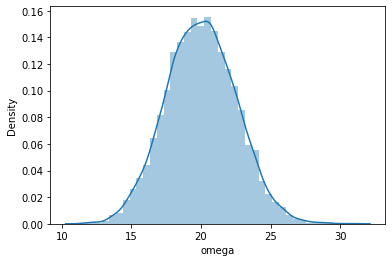

In [6]:
sns.distplot(dsc["omega"], bins=40)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


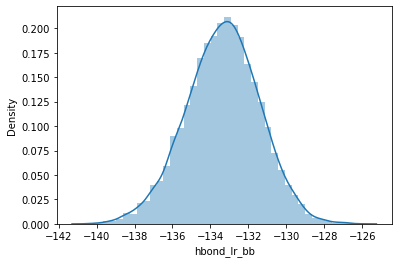

In [5]:
sns.distplot(dsc["hbond_lr_bb"], bins=40)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


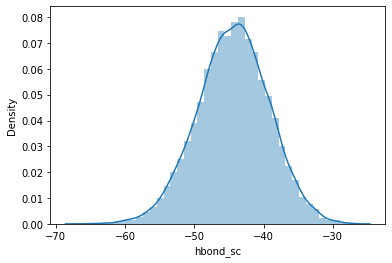

In [31]:
sns.distplot(dsc["hbond_sc"], bins=40)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


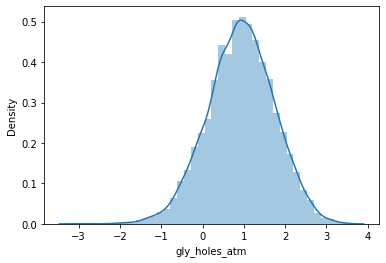

In [32]:
sns.distplot(dsc["gly_holes_atm"], bins=40)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


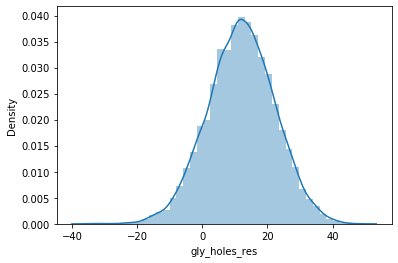

In [33]:
sns.distplot(dsc["gly_holes_res"], bins=40)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


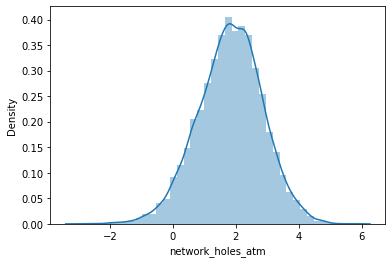

In [34]:
sns.distplot(dsc["network_holes_atm"], bins=40)


/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


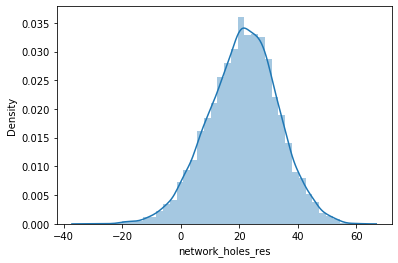

In [35]:
sns.distplot(dsc["network_holes_res"], bins=40)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


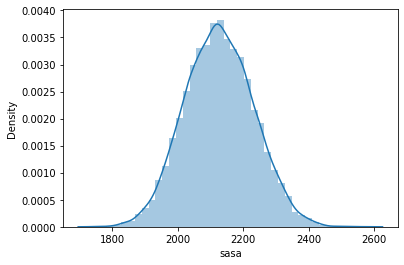

In [36]:
sns.distplot(dsc["sasa"], bins=40)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


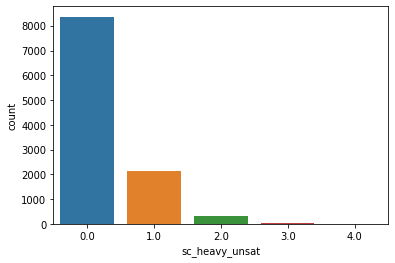

In [37]:
sns.countplot(dsc["sc_heavy_unsat"])

In [39]:
dsc.nlargest(10, 'sasa')

,description,dslf_fa13,fa_atr,fa_dun,fa_elec,fa_intra_rep,fa_intra_sol_xover4,fa_rep,fa_sol,gly_holes_atm,...,network_holes_res,omega,p_aa_pp,pro_close,rama_prepro,ref,sasa,sc_heavy_unsat,total,yhh_planarity
282,10_input_0055_0003_0003_0003_0006_0007,0.0,-964.026,208.684,-471.648,2.08681,32.4575,140.793,661.001,1.212850,...,25.2998,20.3468,-54.6250,0.80331,2.08936,67.9495,2576.18,0.0,-590.599,0.99911
8970,45_input_0111_0002_00011_0005_0003_0002,0.0,-959.709,206.522,-482.519,2.10357,30.7067,143.476,668.449,0.418114,...,34.5567,19.7804,-61.3035,1.23126,0.82745,67.3789,2534.36,0.0,-589.962,1.71246
3867,21_input_0164_0003_0004_0003_0007,0.0,-912.105,208.984,-439.118,2.04872,31.4277,117.124,646.322,1.035820,...,29.8432,18.0054,-59.4595,1.51961,0.38583,47.6406,2532.04,1.0,-585.526,0.85417
9530,47_input_0186_0001_00011_0005_0008_0004,0.0,-950.314,211.448,-489.202,2.12863,32.7233,130.506,693.071,1.888950,...,15.9627,19.0379,-57.6202,0.91582,-3.73583,53.7761,2498.19,1.0,-591.143,1.67787
5122,27_input_0084_0004_0008_0005_0001_0005,0.0,-948.884,220.235,-483.696,2.05282,32.1088,130.417,698.482,1.540490,...,10.1223,20.5489,-58.1091,0.81555,-1.77698,36.2783,2490.46,0.0,-585.360,1.02641
8268,43_input_0013_0004_0006_0005_0010,0.0,-940.863,201.276,-442.453,2.09579,31.4729,121.651,645.945,0.932895,...,16.0341,19.8180,-60.5673,1.19349,-2.82668,65.0491,2486.98,0.0,-611.263,0.94276
8305,43_input_0013_0004_0007_0004_0005_0004,0.0,-969.125,221.988,-499.193,2.08080,34.7215,138.773,705.098,1.546580,...,13.0772,22.6763,-55.6690,0.87914,-2.81315,37.5563,2484.78,1.0,-599.800,0.86635
8112,3_input_0128_0001_0007_0002_0010_0009,0.0,-977.515,215.328,-497.313,2.08429,33.2714,138.779,702.600,0.585895,...,23.8999,20.8002,-53.3188,1.24976,0.08048,41.5469,2459.71,0.0,-605.380,2.36967
3447,20_input_0124_0004_0005_0005_0009_0008,0.0,-978.858,204.201,-482.390,2.12717,31.4780,139.896,676.730,2.064200,...,36.9993,18.5909,-54.9988,0.97201,1.30640,66.0136,2452.51,0.0,-613.557,1.22574
5073,27_input_0084_0004_0006_0005_0003,0.0,-937.905,196.479,-418.929,2.14307,30.9279,123.711,618.550,1.491890,...,44.1886,15.0025,-65.2060,0.74038,-6.92281,72.1118,2451.90,1.0,-604.119,0.54134


In [126]:
dsc.nsmallest(10, 'sasa')

,description,dslf_fa13,fa_atr,fa_dun,fa_elec,fa_intra_rep,fa_intra_sol_xover4,fa_rep,fa_sol,gly_holes_atm,...,network_holes_res,omega,p_aa_pp,pro_close,rama_prepro,ref,sasa,sc_heavy_unsat,total,yhh_planarity
324,10__input_0109_0003_2_0002,0.0,-632.010,142.613,-369.197,1.34975,22.8569,103.8260,472.057,1.460300,...,18.261200,20.2096,-46.6875,1.73925,8.05503,39.2019,345.966,3.0,-358.506,0.00990
253,10__input_0109_0001_1_0003_0008_0002,0.0,-651.449,160.488,-357.602,1.43634,23.8905,110.4630,470.045,1.252200,...,0.896044,23.8937,-45.9709,1.39546,8.45724,37.5580,356.782,1.0,-345.642,1.39019
7473,37__input_0004_0001_8_0002_0010_0003,0.0,-657.622,143.850,-346.552,1.35837,24.5025,101.6180,490.597,0.434910,...,-11.646700,22.2169,-47.6282,0.97466,4.47806,33.7854,357.516,3.0,-363.318,1.14100
3766,20__input_0147_0005_1_0003_0007_0003,0.0,-679.824,153.735,-351.913,1.34223,25.2517,108.2050,492.283,0.575256,...,10.528900,22.6959,-49.1420,1.62486,8.66772,31.7279,357.608,2.0,-376.518,2.28524
3772,20__input_0147_0005_1_0003_0007_0009,0.0,-666.181,153.471,-362.121,1.32230,24.4548,114.1010,491.226,1.673720,...,14.666400,23.8598,-47.9472,1.54907,10.51300,35.0546,365.274,2.0,-359.336,2.21601
7031,34__input_0089_0003_2_0003,0.0,-649.284,127.246,-345.567,1.48628,22.0350,104.1120,467.125,0.642665,...,-25.478400,21.2117,-52.0403,0.90880,1.72309,56.5384,368.686,2.0,-377.631,0.00553
10471,48__input_0158_0004_5_0004,0.0,-654.181,148.984,-353.882,1.37620,26.3134,105.4040,479.024,0.885627,...,3.518870,20.8836,-49.1916,1.90444,6.01423,32.1300,373.519,2.0,-370.456,0.40004
3343,1__input_0029_0004_2_0004_0010_0009,0.0,-650.796,167.518,-365.750,1.28732,24.7904,109.6980,484.419,1.212150,...,8.309230,19.7687,-47.2715,1.04166,7.86988,20.7659,374.164,1.0,-359.922,1.57153
8062,40__input_0022_0005_2_0003,0.0,-601.000,121.007,-333.507,1.26626,19.7659,95.5652,447.036,1.933170,...,40.334800,21.0191,-51.1115,1.43678,5.05218,43.2045,376.420,2.0,-358.986,0.31006
7504,37__input_0004_0002_1_0001,0.0,-649.158,139.540,-345.188,1.34261,21.8560,100.7590,470.084,0.226579,...,33.913400,16.2074,-51.6767,1.21975,0.07859,38.5094,378.324,3.0,-382.324,0.00264


In [15]:
dsc.nsmallest(10, 'hbond_sc')

,description,dslf_fa13,fa_atr,fa_dun,fa_elec,fa_intra_rep,fa_intra_sol_xover4,fa_rep,fa_sol,gly_holes_atm,...,network_holes_res,omega,p_aa_pp,pro_close,rama_prepro,ref,sasa,sc_heavy_unsat,total,yhh_planarity
3860,20_input_0173_0003_0009_0004_0001_0004,0.0,-996.318,228.149,-513.777,2.24766,35.9602,137.628,725.637,1.736990,...,24.79680,19.7114,-54.6248,0.93591,2.93688,47.5672,2062.61,0.0,-613.198,1.39739
6330,32_input_0104_0004_0006_0002_0010_0006,0.0,-999.554,229.978,-496.020,2.16323,34.6106,133.380,710.416,-0.302051,...,5.57286,20.6960,-56.2559,0.87428,-0.14106,37.4423,2016.89,0.0,-627.768,1.77783
3020,1_input_0034_0002_00013_0005_0001_0008,0.0,-1009.640,235.608,-494.827,2.22968,34.5716,136.308,722.135,1.009500,...,22.76080,18.7964,-54.7529,1.11924,2.09177,48.8936,2065.40,1.0,-602.751,2.61206
3201,1_input_0034_0005_0006_0005_0001_0004,0.0,-968.103,213.360,-486.017,2.06511,32.0725,129.714,708.632,1.029350,...,19.49670,19.9274,-55.8340,1.51604,0.84428,51.7945,2207.99,0.0,-595.618,1.26370
3866,20_input_0173_0003_0009_0004_0001_0010,0.0,-1002.520,216.860,-491.421,2.25238,34.6572,139.665,687.630,1.855930,...,23.91860,21.5035,-55.6480,0.72689,3.45503,67.4327,1965.89,0.0,-618.412,1.22551
3197,1_input_0034_0005_0006_0005_0001,0.0,-914.575,198.998,-453.127,2.00450,30.5736,113.291,669.401,1.513440,...,6.94814,18.3352,-57.7610,1.22969,-1.14613,50.7774,2281.83,1.0,-595.130,1.11549
3825,20_input_0173_0003_00022_0002_0001_0002,0.0,-980.101,214.930,-498.959,2.18429,33.9087,132.151,703.257,1.586490,...,24.08250,22.4231,-53.5825,0.90352,-0.92491,54.0961,1950.91,1.0,-614.830,2.55005
3861,20_input_0173_0003_0009_0004_0001_0005,0.0,-998.026,238.037,-517.200,2.18621,34.6024,134.815,739.622,0.297871,...,14.10960,21.2985,-51.7756,0.72050,4.63425,34.1806,2024.26,0.0,-603.957,0.45862
3740,20_input_0173_0003_00014_0005_0002_0005,0.0,-984.970,216.924,-506.374,2.11994,34.4772,140.074,718.663,0.618823,...,1.25619,18.7716,-53.3481,0.89868,4.21422,42.3231,1931.99,0.0,-604.966,1.93937
7279,38_input_0094_0003_0007_0002_0007_0007,0.0,-981.985,226.124,-501.838,2.21458,32.7387,131.510,701.987,1.393020,...,26.82490,20.7158,-52.5991,1.80751,4.41600,49.9792,2258.95,0.0,-606.687,2.30752


In [38]:
dsc.nlargest(10, 'hbond_sc')

,description,dslf_fa13,fa_atr,fa_dun,fa_elec,fa_intra_rep,fa_intra_sol_xover4,fa_rep,fa_sol,gly_holes_atm,...,network_holes_res,omega,p_aa_pp,pro_close,rama_prepro,ref,sasa,sc_heavy_unsat,total,yhh_planarity
4325,23_input_0109_0003_0009_0002_0001_0007,0.0,-980.080,199.895,-450.312,2.26963,28.3841,141.596,607.016,1.372280,...,21.78810,17.9285,-62.5746,1.17605,-4.12930,98.8389,2057.08,0.0,-620.442,2.15763
4323,23_input_0109_0003_0009_0002_0001_0005,0.0,-967.458,185.328,-437.608,2.20025,27.2384,142.385,594.028,1.902480,...,37.27550,15.8340,-62.1521,1.11049,-2.49167,102.6020,1986.47,0.0,-620.939,2.23387
4541,25_input_0015_0003_0005_0004_0006_0006,0.0,-972.463,201.782,-445.229,2.21480,29.1236,142.526,628.027,1.657900,...,40.62240,17.6944,-64.2462,0.80052,-4.29839,88.9923,2183.33,0.0,-593.601,0.60228
1141,13_input_0076_0004_0005_0002_0008_0008,0.0,-997.968,212.723,-452.471,2.21654,32.1914,142.656,644.705,0.924547,...,5.56323,23.1424,-58.6925,1.12471,0.37493,65.5952,2121.89,1.0,-597.034,1.13704
1345,14_input_0012_0004_00010_0004_0010_0005,0.0,-1003.270,206.823,-460.857,2.20297,28.4417,145.030,645.981,0.303291,...,30.05090,20.3174,-58.9799,1.25595,0.36920,85.5287,1918.70,2.0,-609.507,1.48617
8651,43_input_0127_0003_0006_0003_0004_0009,0.0,-998.006,185.322,-418.387,2.30027,28.9800,140.362,601.757,0.972899,...,12.53070,21.3828,-69.9663,0.88177,-6.84229,118.8850,1980.74,0.0,-619.619,1.02427
8643,43_input_0127_0003_0006_0003_0004_0001,0.0,-999.234,193.737,-425.976,2.28555,28.9922,139.954,607.039,1.600270,...,16.89280,20.6508,-67.6256,0.80986,-3.58420,110.0230,2026.26,0.0,-615.509,1.12514
544,11_input_0049_0005_0009_0001_0004_0005,0.0,-981.331,212.480,-470.392,2.23490,29.8360,145.033,653.023,1.333130,...,-8.52964,20.3423,-60.3478,1.34112,-0.26142,68.1515,2117.98,0.0,-598.887,1.99791
10304,4_input_0048_0004_00019_0003_0004_0002,0.0,-997.801,208.556,-482.915,2.17218,32.7091,144.436,690.845,0.769831,...,30.50560,21.3996,-53.8665,0.73264,2.92708,67.8949,2021.33,0.0,-585.528,1.94554
6746,34_input_0043_0004_00014_0004_0004_0005,0.0,-990.673,199.602,-465.490,2.24659,30.7436,144.098,654.508,-0.001697,...,27.13670,20.5024,-56.5425,0.80312,4.52813,79.3419,1839.61,3.0,-601.857,1.21834


In [39]:
dsc.nlargest(10, 'sc_heavy_unsat')

,description,dslf_fa13,fa_atr,fa_dun,fa_elec,fa_intra_rep,fa_intra_sol_xover4,fa_rep,fa_sol,gly_holes_atm,...,network_holes_res,omega,p_aa_pp,pro_close,rama_prepro,ref,sasa,sc_heavy_unsat,total,yhh_planarity
3231,1_input_0034_0005_0008_0003_0003_0001,0.0,-965.723,212.681,-495.569,2.13800,30.2249,139.091,691.647,1.696950,...,20.51510,19.9649,-60.3512,1.65119,-0.24558,66.1376,2221.58,4.0,-594.617,2.63221
3678,20_input_0142_0004_00017_0003_0006_0009,0.0,-994.807,209.040,-469.324,2.13394,30.9301,142.528,691.058,-1.092970,...,-6.33542,20.0677,-59.4912,0.68528,0.20551,60.9079,1904.50,4.0,-605.547,2.89616
3752,20_input_0173_0003_00017_0004_0009_0006,0.0,-981.003,230.452,-536.242,2.18582,35.6764,140.786,734.818,1.639720,...,35.27670,17.9496,-52.5015,1.18451,4.27246,33.2952,2022.71,4.0,-594.096,1.72912
1,0_input_0069_0003_00010_0001_0002_0001,0.0,-953.029,233.222,-515.929,2.06844,32.1801,133.150,711.438,2.093730,...,3.74976,21.5317,-53.5293,1.82101,-1.58657,25.7583,2360.46,3.0,-592.617,2.04212
12,0_input_0069_0003_0006_0004_0004_0001,0.0,-988.026,217.014,-497.183,2.11401,31.9762,142.860,698.804,-0.914714,...,10.89450,18.6223,-53.9855,1.21833,3.97336,56.0170,2192.04,3.0,-601.565,1.55895
1103,12_input_0174_0003_00010_0001_0004_0003,0.0,-1010.270,219.024,-486.888,2.16628,30.9470,139.902,688.443,0.867276,...,8.97354,24.0787,-54.9962,0.91792,1.08395,67.2630,2093.59,3.0,-614.380,1.43392
1198,13_input_0076_0004_0007_0005_0002_0001,0.0,-983.165,220.639,-496.950,2.16887,31.8985,142.286,700.500,0.914689,...,29.73270,17.0767,-57.0175,1.65645,0.54377,60.3883,2248.31,3.0,-592.835,2.11148
1268,13_input_0141_0002_00021_0004_0002_0005,0.0,-978.350,216.455,-481.998,2.18386,32.8819,135.296,681.530,1.171380,...,14.96110,18.5312,-55.8081,1.72674,3.99325,55.7467,2170.02,3.0,-586.010,1.63630
1272,13_input_0141_0002_00021_0004_0002_0009,0.0,-986.401,217.318,-472.677,2.19191,32.8988,136.513,675.924,0.261760,...,16.86140,20.0755,-58.3697,1.29863,1.65336,61.5507,2042.52,3.0,-598.135,1.58586
1292,13_input_0141_0002_00022_0005_0005_0007,0.0,-977.999,214.428,-477.111,2.20492,33.5851,143.060,670.395,1.182380,...,2.77391,18.7861,-57.9504,0.69650,3.05710,61.3328,2256.70,3.0,-605.476,2.17866


In [11]:
dhbnet = pd.DataFrame()
for item in net_list:
    net_score = {}
    for file in glob.glob("network_filter_fasol09/"+item+"/*_nativenetwork_*.pdb"):
        net_res = []
        cst_file = file.replace('nativenetwork', 'native_network')
        cst_file = cst_file.replace('pdb', 'cst')
        cst = ""
        n_hbonds = 0
#        net_score["net_tyr26"] = False
        with open(cst_file, 'r') as cst_i:
            for line in cst_i:
                if "AtomPair" in line:
                    cst += line[1:]
                    n_hbonds += 1
                else:
                    cst += line
#        net_score["net_tyr114"] = False        
        with open(file, 'r') as in_net:
            for line in in_net:
                if "ATOM " in line:
                    res_num = int(line.split()[5])
                    res_name = line.split()[3]
                    if res_name not in ["ALA","GLY","PRO"] and res_num not in net_res:
                        net_res.append(res_num)
                    if res_name == "TYR" and res_num == 26:
                        for line in in_net:
                            if "HBNet_NumUnsatHpol" in line:
                                net_score["HBNet_NumUnsatHpol_Y26"] = float(line.split(" ")[1])
                            elif "HBNet_Saturation" in line:
                                net_score["HBNet_saturation_Y26"] = float(line.split(" ")[1])
                            elif "HBNet_Score" in line:
                                net_score["HBNet_Score_Y26"] = float(line.split(" ")[1])
                        net_score["network_Y26"] = net_res
                        net_score["n_res_network_Y26"] = len(net_res)
                        net_score["network_cst_Y26"] = cst
                        net_score["n_hbonds_Y26"] = n_hbonds
                    elif res_name == "TYR" and res_num == 114:
                        for line in in_net:
                            if "HBNet_NumUnsatHpol" in line:
                                net_score["HBNet_NumUnsatHpol_Y114"] = float(line.split(" ")[1])
                            elif "HBNet_Saturation" in line:
                                net_score["HBNet_saturation_Y114"] = float(line.split(" ")[1])
                            elif "HBNet_Score" in line:
                                net_score["HBNet_Score_Y114"] = float(line.split(" ")[1])
                        net_score["network_Y114"] = net_res
                        net_score["n_res_network_Y114"] = len(net_res)
                        net_score["network_cst_Y114"] = cst
                        net_score["n_hbonds_Y114"] = n_hbonds
    net_score["description"] = item

#        if 10 in net_score["network"]:
#            net_score["net_tyr10"] = True
#        else:
#            net_score["net_tyr10"] = False
#        if 68 in net_score["network"]:
#            net_score["net_tyr68"] = True
#        else:
#            net_score["net_tyr68"] = False
    dhbnet = dhbnet.append(net_score, ignore_index=True)
print(dhbnet)

       HBNet_NumUnsatHpol_Y114  HBNet_NumUnsatHpol_Y26  HBNet_Score_Y114  \
0                          0.0                     0.0          -3.62420   
1                          0.0                     0.0          -3.36230   
2                          0.0                     0.0          -3.30417   
3                          0.0                     0.0          -3.06816   
4                          0.0                     0.0          -3.41150   
...                        ...                     ...               ...   
10918                      NaN                     NaN               NaN   
10919                      NaN                     NaN               NaN   
10920                      0.0                     NaN          -3.32517   
10921                      NaN                     NaN               NaN   
10922                      NaN                     NaN               NaN   

       HBNet_Score_Y26  HBNet_saturation_Y114  HBNet_saturation_Y26  \
0             -3

In [12]:
# dhbnet["tyrs"] = dhbnet["net_tyr26"] + dhbnet["net_tyr114"]
dhbnet["saturation_Y26"] = dhbnet["n_hbonds_Y26"]/dhbnet["n_res_network_Y26"]
dhbnet["saturation_Y114"] = dhbnet["n_hbonds_Y114"]/dhbnet["n_res_network_Y114"]

print(dhbnet)

       HBNet_NumUnsatHpol_Y114  HBNet_NumUnsatHpol_Y26  HBNet_Score_Y114  \
0                          0.0                     0.0          -3.62420   
1                          0.0                     0.0          -3.36230   
2                          0.0                     0.0          -3.30417   
3                          0.0                     0.0          -3.06816   
4                          0.0                     0.0          -3.41150   
...                        ...                     ...               ...   
10918                      NaN                     NaN               NaN   
10919                      NaN                     NaN               NaN   
10920                      0.0                     NaN          -3.32517   
10921                      NaN                     NaN               NaN   
10922                      NaN                     NaN               NaN   

       HBNet_Score_Y26  HBNet_saturation_Y114  HBNet_saturation_Y26  \
0             -3

In [13]:
dhbnet.to_pickle('networks.pickle')

In [7]:
dhbnet = pd.read_pickle('networks.pickle')

In [8]:
print(dhbnet.loc[dhbnet["description"] == "49__input_0063_0003_5_0005_0006_0009"])

Empty DataFrame
Columns: [HBNet_NumUnsatHpol, HBNet_Score, HBNet_saturation, description, n_hbonds, n_res_network, net_tyr114, net_tyr26, network, network_cst, tyrs, saturation]
Index: []


/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


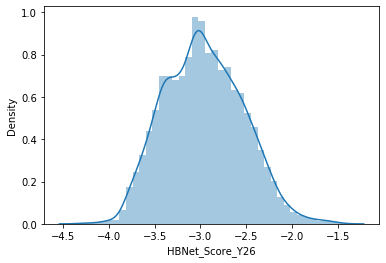

In [14]:
# select based on the quality of the network: good hbond_sc, n_hbonds, presence of 10 or 68, good network energy.
sns.distplot(dhbnet["HBNet_Score_Y26"], bins=40)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


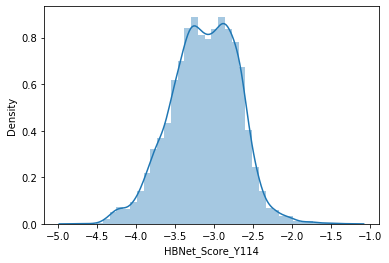

In [15]:
# select based on the quality of the network: good hbond_sc, n_hbonds, presence of 10 or 68, good network energy.
sns.distplot(dhbnet["HBNet_Score_Y114"], bins=40)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


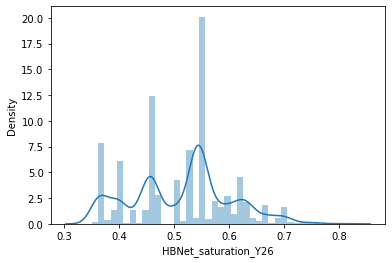

In [16]:
sns.distplot(dhbnet["HBNet_saturation_Y26"], bins=40)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


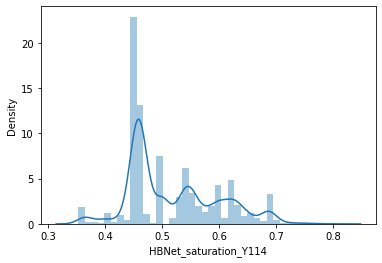

In [17]:
sns.distplot(dhbnet["HBNet_saturation_Y114"], bins=40)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


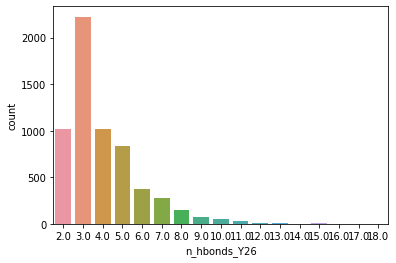

In [18]:
sns.countplot(dhbnet["n_hbonds_Y26"])

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


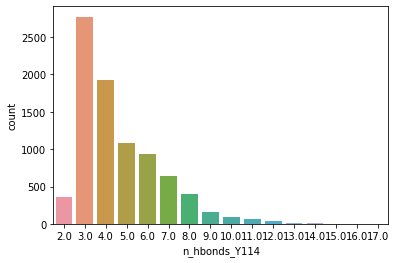

In [19]:
sns.countplot(dhbnet["n_hbonds_Y114"])

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


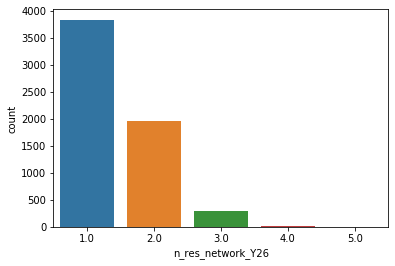

In [20]:
sns.countplot(dhbnet["n_res_network_Y26"])

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


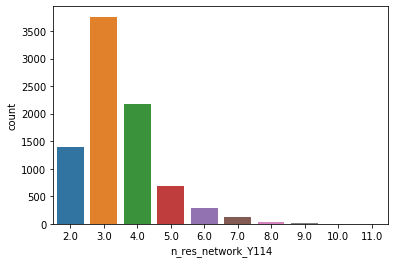

In [29]:
sns.countplot(dhbnet["n_res_network_Y114"])

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


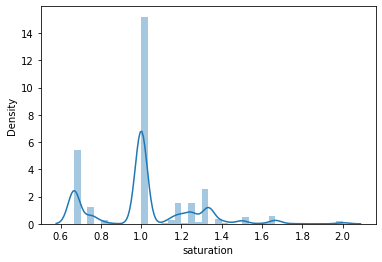

In [47]:
sns.distplot(dhbnet["saturation"], bins=40)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


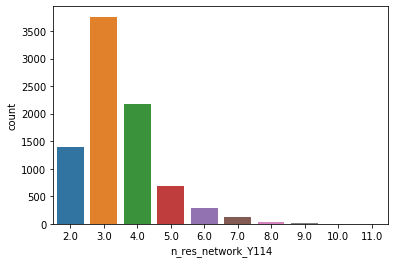

In [38]:
sns.countplot(dhbnet["n_res_network_Y114"])

In [6]:
df = pd.merge(dsc, dhbnet, how='left', on=['description'])
df = df.loc[~df.network_Y114.isnull()]
df = df.loc[~df.network_Y26.isnull()]
print(df)

NameError: name 'dsc' is not defined

In [22]:
df.to_pickle('all_designs_with_hbnet.pickle')

In [7]:
df = pd.read_pickle("all_designs_with_hbnet.pickle")

In [8]:
dpicked = df.loc[(df["hbond_sc"] < -30.0) & (df["HBNet_Score_Y114"] < -2.5) & (df["HBNet_Score_Y26"] < -2.5)& (df["omega"] < 20)]
dpicked.shape

(1795, 47)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


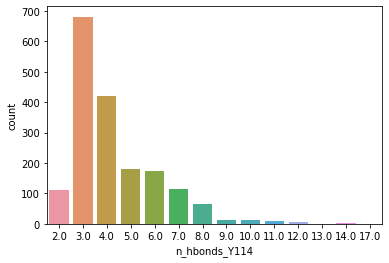

In [9]:
sns.countplot(dpicked["n_hbonds_Y114"])

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


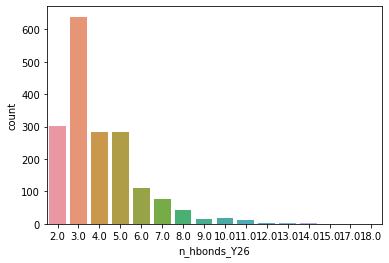

In [25]:
sns.countplot(dpicked["n_hbonds_Y26"])

In [5]:
len(dpicked.description.unique())

1795

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


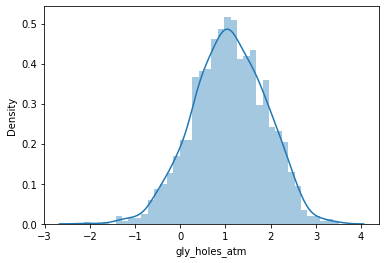

In [27]:
sns.distplot(dpicked["gly_holes_atm"], bins=40)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


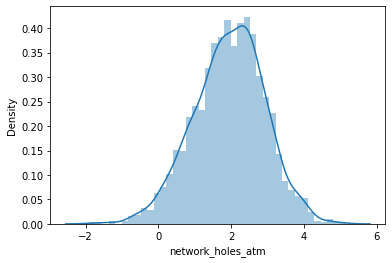

In [28]:
sns.distplot(dpicked["network_holes_atm"], bins=40)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


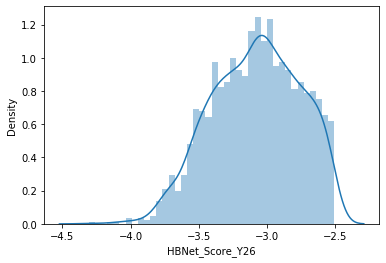

In [29]:
sns.distplot(dpicked["HBNet_Score_Y26"], bins=40)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


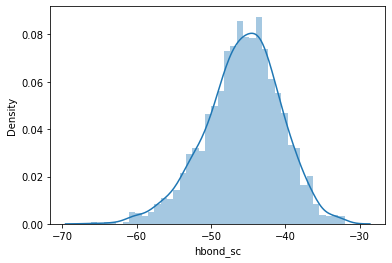

In [30]:
sns.distplot(dpicked["hbond_sc"], bins=40)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


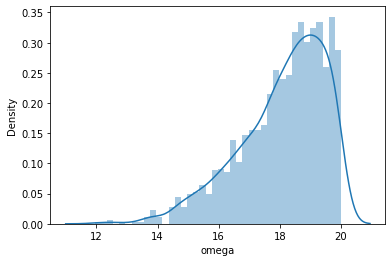

In [31]:
sns.distplot(dpicked["omega"], bins=40)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


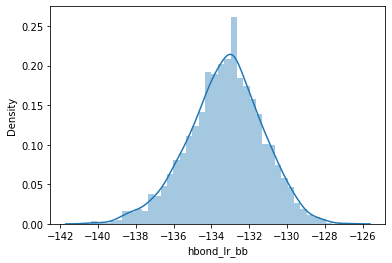

In [55]:
sns.distplot(dpicked["hbond_lr_bb"], bins=40)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


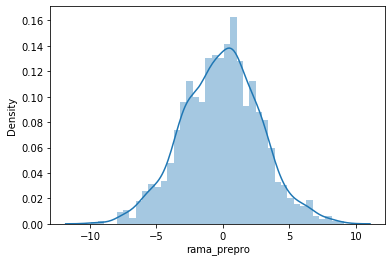

In [56]:
sns.distplot(dpicked["rama_prepro"], bins=40)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


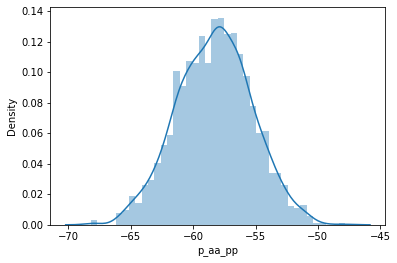

In [5]:
sns.distplot(dpicked["p_aa_pp"], bins=40)

In [32]:
dpicked.description.unique()

array(['0_input_0069_0003_00010_0001_0002',
       '0_input_0069_0003_00010_0001_0002_0005',
       '0_input_0069_0003_0006_0004_0004', ...,
       '9_input_0062_0004_00010_0003_0010_0007',
       '9_input_0062_0004_00010_0003_0010_0010',
       '9_input_0062_0004_0006_0004_0010_0007'], dtype=object)

In [9]:
dpicked.loc[dpicked["description"] == "33__input_0053_0005_1_0002_0007_0005"]

,description,dslf_fa13,fa_atr,fa_dun,fa_elec,fa_intra_rep,fa_intra_sol_xover4,fa_rep,fa_sol,gly_holes_atm,...,HBNet_Score,HBNet_saturation,n_hbonds,n_res_network,net_tyr10,net_tyr68,network,network_cst,tyrs,saturation


/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


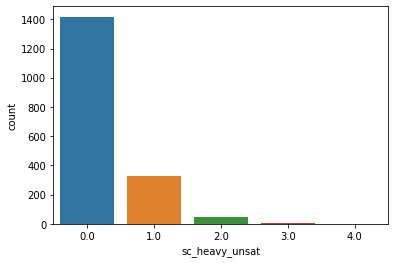

In [35]:
sns.countplot(dpicked["sc_heavy_unsat"])

In [60]:
from shutil import copyfile

for model in dpicked.description:
    pdb = "filter_" + model + "_0001.pdb"
    final_model = model + ".pdb"
    source = "network_filter_fasol09/" + pdb
    target = "round3_fasol09_surf/" + final_model
    copyfile(source, target)

In [7]:
print(dpicked.network_cst_Y114)

0        # 0_input_0069_0003_00010_0001_0002_0001_nativ...
5        # 0_input_0069_0003_00010_0001_0002_0005_0001_...
11       # 0_input_0069_0003_0006_0004_0004_0001_native...
13       # 0_input_0069_0003_0006_0004_0004_0002_0001_n...
14       # 0_input_0069_0003_0006_0004_0004_0003_0001_n...
                               ...                        
10789    # 9_input_0062_0004_00010_0003_0010_0005_0001_...
10790    # 9_input_0062_0004_00010_0003_0010_0006_0001_...
10791    # 9_input_0062_0004_00010_0003_0010_0007_0001_...
10794    # 9_input_0062_0004_00010_0003_0010_0010_0001_...
10812    # 9_input_0062_0004_0006_0004_0010_0007_0001_n...
Name: network_cst_Y114, Length: 1795, dtype: object


In [10]:
dpicked["network_name_Y114"] = dpicked["network_cst_Y114"].str.split("#")
dpicked["network_name_Y26"] = dpicked["network_cst_Y26"].str.split("#")
print(dpicked)

                                  description  dslf_fa13   fa_atr   fa_dun  \
0           0_input_0069_0003_00010_0001_0002        0.0 -915.852  216.578   
5      0_input_0069_0003_00010_0001_0002_0005        0.0 -949.613  230.890   
11           0_input_0069_0003_0006_0004_0004        0.0 -935.577  215.361   
13      0_input_0069_0003_0006_0004_0004_0002        0.0 -966.009  209.774   
14      0_input_0069_0003_0006_0004_0004_0003        0.0 -963.705  214.547   
...                                       ...        ...      ...      ...   
10789  9_input_0062_0004_00010_0003_0010_0005        0.0 -969.893  208.239   
10790  9_input_0062_0004_00010_0003_0010_0006        0.0 -997.079  212.627   
10791  9_input_0062_0004_00010_0003_0010_0007        0.0 -988.758  223.673   
10794  9_input_0062_0004_00010_0003_0010_0010        0.0 -982.443  207.308   
10812   9_input_0062_0004_0006_0004_0010_0007        0.0 -966.350  220.067   

       fa_elec  fa_intra_rep  fa_intra_sol_xover4   fa_rep   fa

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/software/conda/envs/pyrosetta/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
for index, row in dpicked.iterrows():
    network_name = row["network_name"][1].strip()
    network_name = network_name.replace("native_network", "nativenetwork")
    network_name = network_name.replace(".cst", ".pdb")
    directory = row["description"]
    print(network_name)
    source = "network_filter/" + directory + "/" + network_name
    target = "individual_networks/" + network_name
    copyfile(source, target)

In [14]:
for index, row in dpicked.iterrows():
    cst_file = "round3_fasol09_surf/" + row.description + ".cst"
    with open(cst_file, "w") as out_cst:
        out_cst.write(row.network_cst_Y114)
        out_cst.write(row.network_cst_Y26)

In [12]:
dpicked.to_pickle('picked_networks.pickle')